The MARVIN API provides all kinds of figures: https://sdss-marvin.readthedocs.io/en/stable/index.html

Here let's plot :

0. All-color Image
1. Stellar velocity 
2. Stellar Dispersion

3. Gas(Ha[6564]) velocity
4. Gas(Ha[6564]) Dispersion

5. EW OIII[5008] Field
6. EW Ha[6564] Field

see:https://sdss-marvin.readthedocs.io/en/latest/datamodel/mpl10.html?highlight=MPL-10#mpl10dap

specifically regarding to MPL-10:DAP

There are some problems with the MAPS file of MaNGA:

1. Some plateifu in the header file actually dosen't exist, causing a response of 404.

2. Some files contain nothing, returning array of 0s. 

So there are sections in the pipeline addressing to those issues. 

In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from math import inf
from astropy.io import fits
from marvin.tools import Maps
from marvin.utils.general.images import showImage



[INFO]: No release version set. Setting default to DR17
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)
[WARNING]: Passing field metadata as keyword arguments is deprecated. Use the explicit `metadata=...` argument instead. Additional metadata: {'location': 'view_args'} (RemovedInMarshmallow4Warning)
[WARNING]: The 'missing' argument to fields is deprecated. Use 'load_default' instead. (RemovedInMarshmallow4Warning)


#First, let's take a look at the optical image of our target
image = showImage(plateifu='10518-3704')

## Then, let's make some plot
### Velocity and dispersion goes first

[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: invalid value encountered in multiply (RuntimeWarning)
[WARNING]: invalid value encountered in sqrt (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)


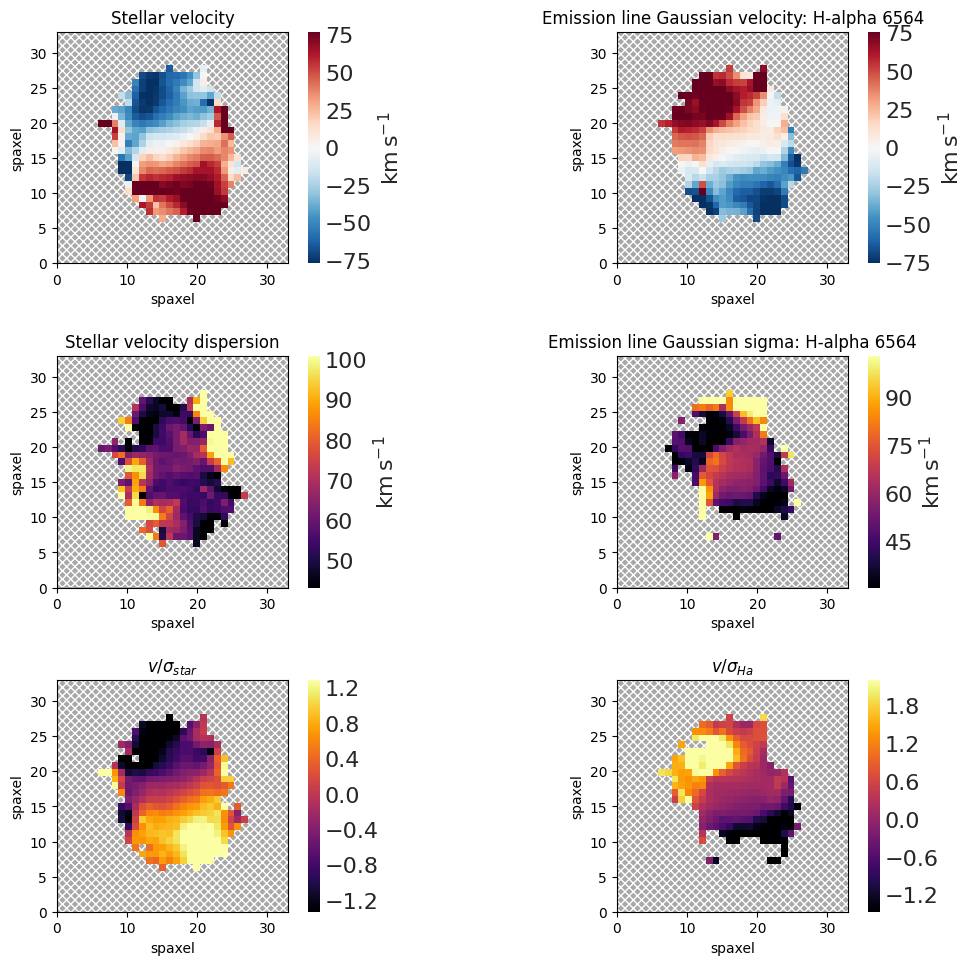

In [10]:
#Reading MAPS using 'plateifu' and SPX-MILESHC-MASTARSSP datatype
maps = Maps("7495-1902", bintype='SPX', template='MILESHC-MASTARSSP')

#Steller velocity and dispersion
st_vel = maps.stellar_vel
st_sig = maps.stellar_sigma
st_sig_corr = st_sig.inst_sigma_correction() #sig must be corrected as link below
#https://sdss-mangadap.readthedocs.io/en/latest/corrections.html#corrections

#gas(Ha_6563) velocity and dispersion
ha_vel = maps.emline_gvel_ha_6564
ha_sig = maps.emline_gsigma_ha_6564
ha_sig_corr = ha_sig.inst_sigma_correction()

v_s_star = maps.stellar_vel / st_sig_corr
v_s_gas = maps.emline_gvel_ha_6564 / ha_sig_corr

#Establish canvas and plot
fig, axes = plt.subplots (nrows=3, ncols=2,figsize =(12,11))

st_vel.plot(fig = fig , ax = axes [0,0], snr_min = None)
st_sig_corr.plot(fig = fig, ax = axes [1,0])
v_s_star.plot(fig = fig, ax = axes [2,0], title = r"$v/\sigma_{star}$", snr_min = None )
ha_vel.plot(fig = fig , ax = axes [0,1])
ha_sig_corr.plot(fig = fig, ax = axes [1,1])
v_s_gas.plot(fig = fig, ax = axes [2,1], title = r"$v/\sigma_{Ha}$", snr_min = None )


#Adjusting plot spaceing
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## And then Flux, EW, and Class NII, SII

[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


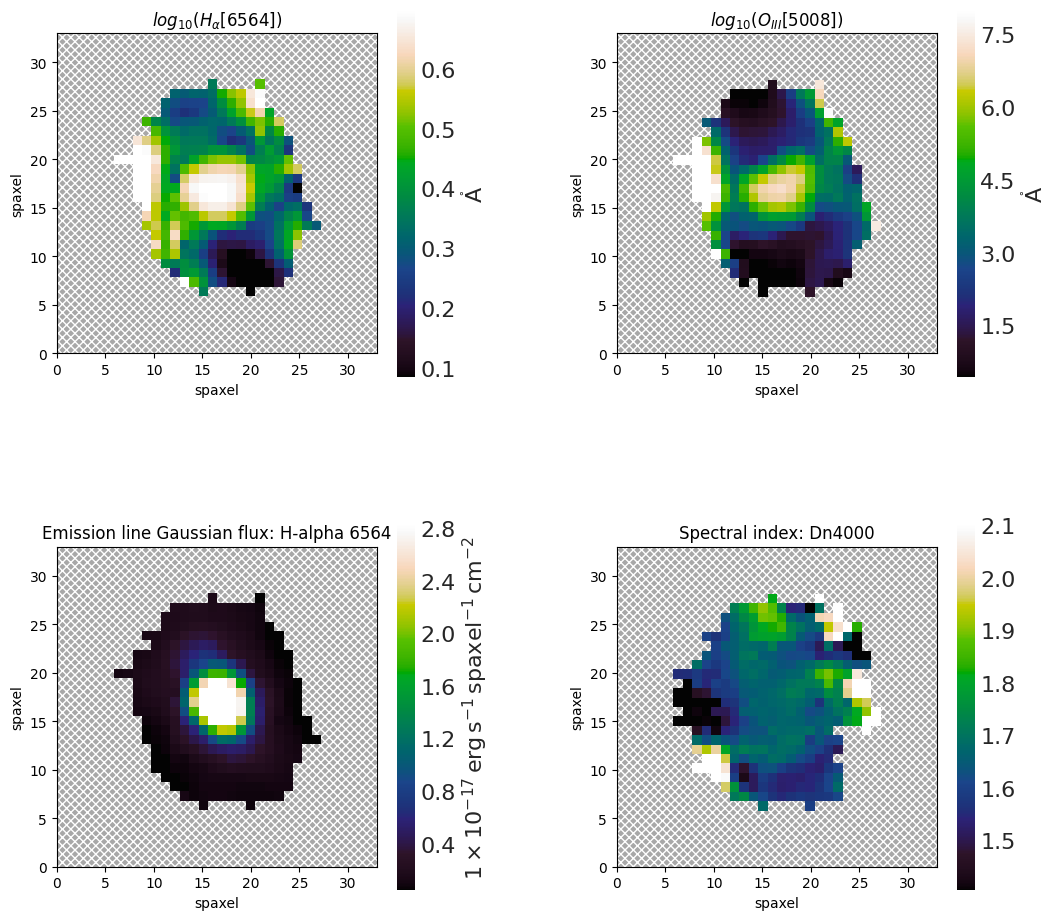

In [8]:
#Equivalent Width
ha_log_ew = np.log10(maps.emline_gew_ha_6564)
oiii_log_ew = np.log10(maps.emline_gew_oiii_5008)

ha_ew = maps.emline_gew_ha_6564
oiii_ew = maps.emline_gew_oiii_5008

#Ha Flux
flux_ha = maps.emline_gflux_ha_6564

#Dn4000
dn4000 = maps.specindex_dn4000

#Establish canvas and plot
fig1, axes1 = plt.subplots (nrows=2, ncols=2,figsize =(12,11))

ha_log_ew.plot(fig = fig1 , ax = axes1 [0,0], title = r"$log_{10}(H_{\alpha}[6564])$", snr_min = None)
oiii_ew.plot(fig = fig1, ax = axes1 [0,1], title = r"$log_{10}(O_{III}[5008])$", snr_min = None)
flux_ha.plot(fig = fig1, ax = axes1 [1,0])
dn4000.plot(fig = fig1 , ax = axes1 [1,1])



#Adjusting plot spaceing
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

### Debuging log10(EW) colorbar error

oiii_log_ew.plot(title = r"$log_{10}(O_{III}[5008])$", snr_min = None)
plt.show()


## Plot the BPT

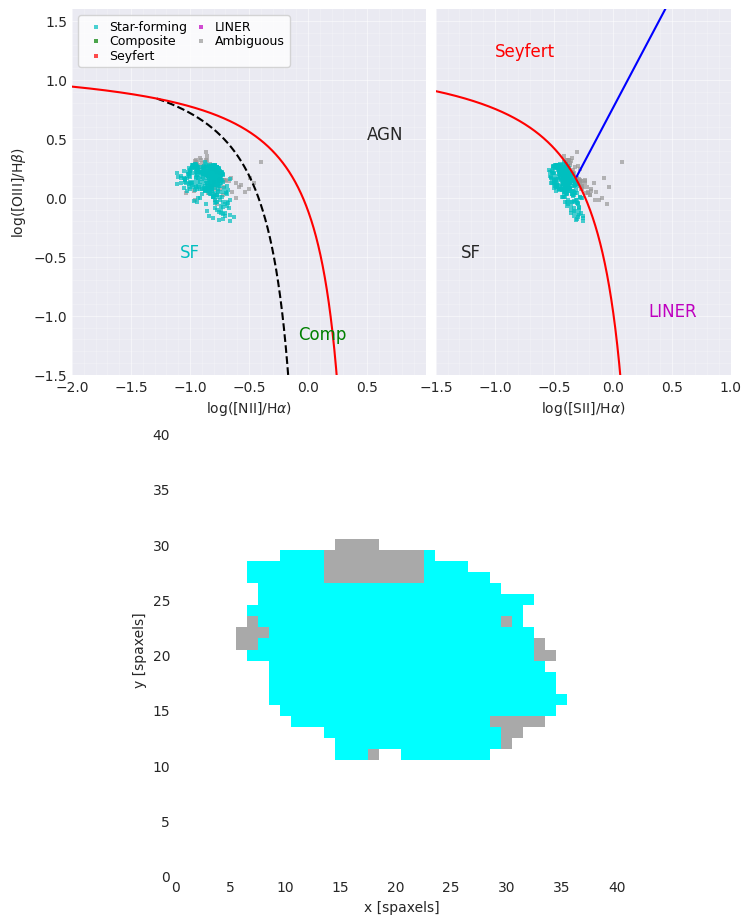

In [6]:
#maps = Maps("8240-6103", bintype='SPX', template='MILESHC-MASTARSSP')
mask, fig, axes = maps.get_bpt(use_oi = False)

## Now let's plot the OIII of our obvious bi-cone galaxies:

In [4]:
PATH = '/Users/runquanguan/Documents/Research/MaNGA-AGN/Pipeline&Instrction/obvious_bicone_feature_position.fits'

hdul = fits.open(PATH)
hdu = hdul[1].data

7958-9101


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)
[WARNING]: invalid value encountered in log10 (RuntimeWarning)


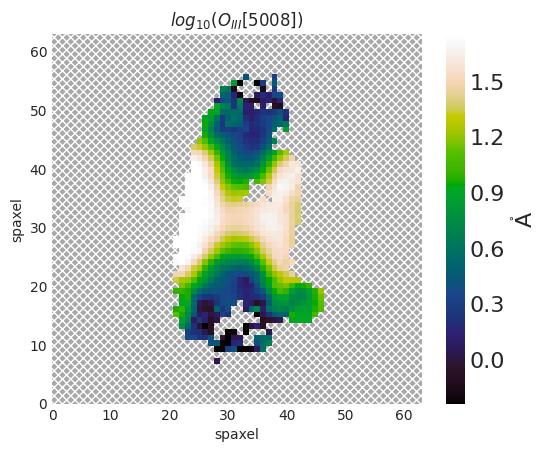

7972-3704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


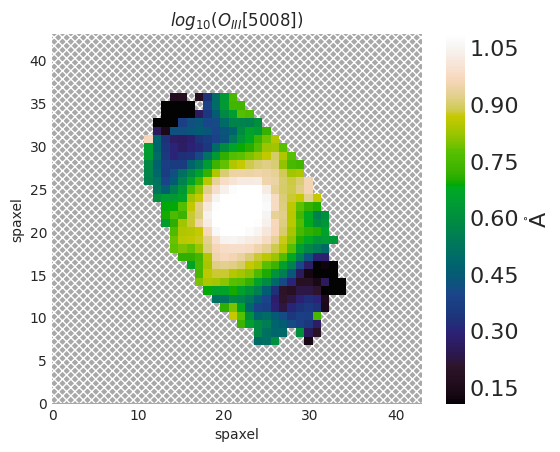

8138-6101


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


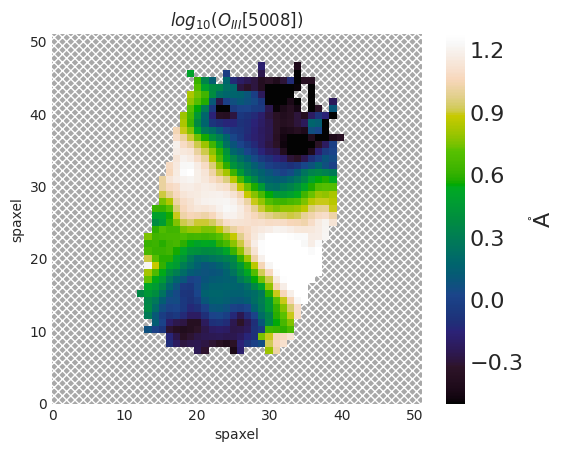

8252-9101


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)
[WARNING]: invalid value encountered in log10 (RuntimeWarning)


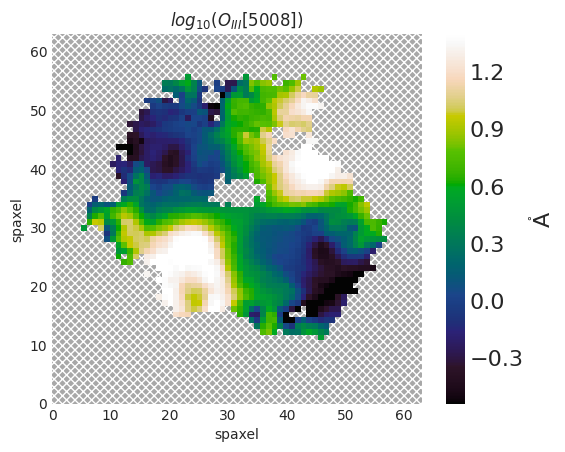

8465-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


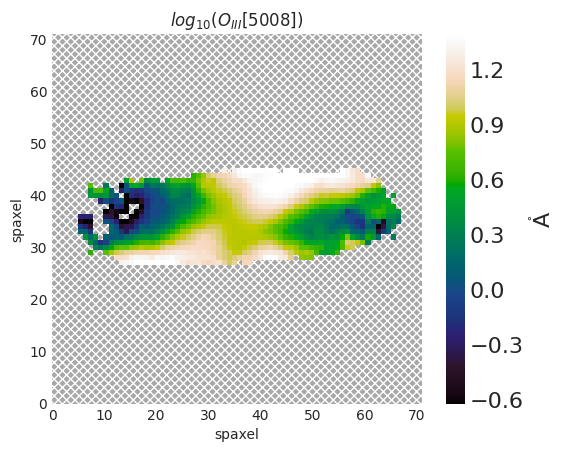

8486-12705


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)
[WARNING]: invalid value encountered in log10 (RuntimeWarning)
[WARNING]: invalid value encountered in subtract (RuntimeWarning)


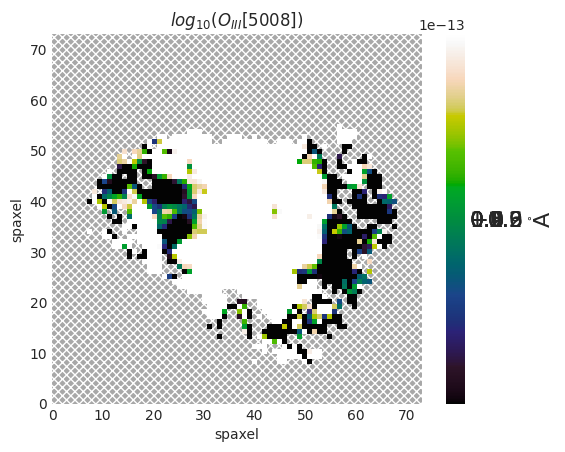

8715-6103


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


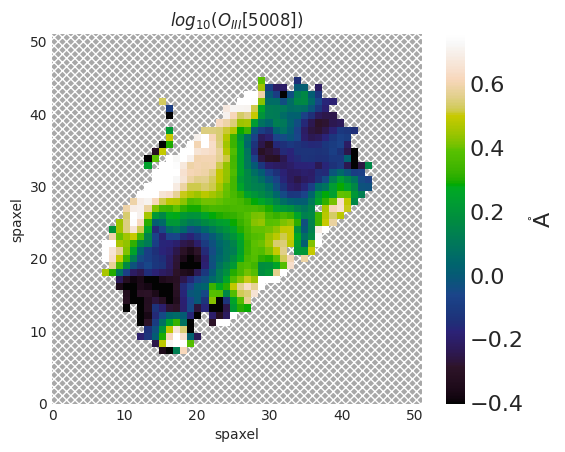

8718-12702


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


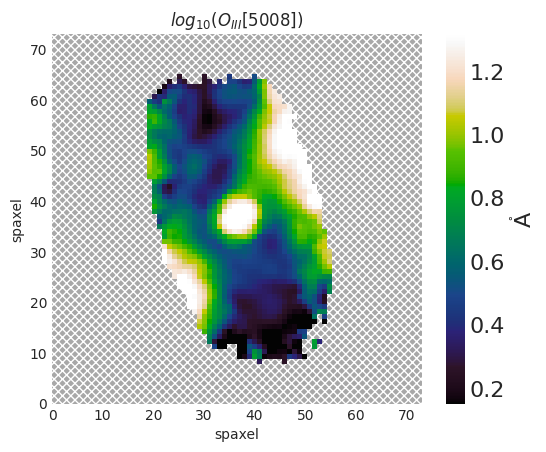

9031-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)
[WARNING]: invalid value encountered in subtract (RuntimeWarning)


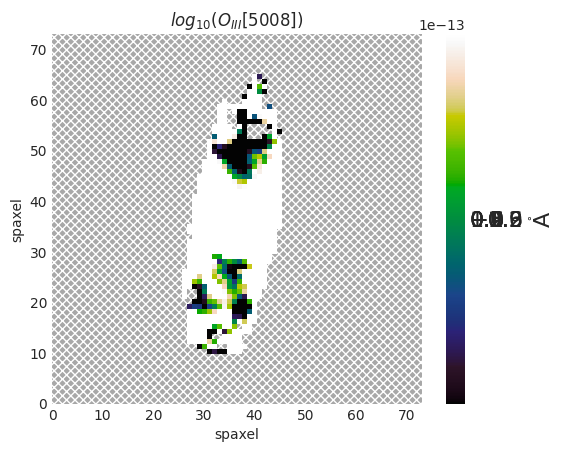

9867-9102


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)
[WARNING]: invalid value encountered in log10 (RuntimeWarning)


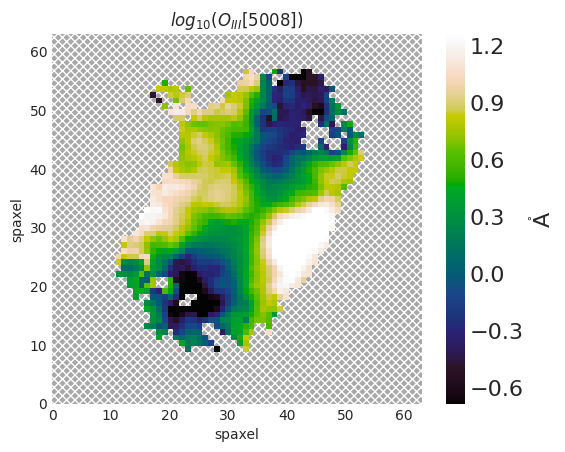

10502-12701


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)
[WARNING]: invalid value encountered in subtract (RuntimeWarning)


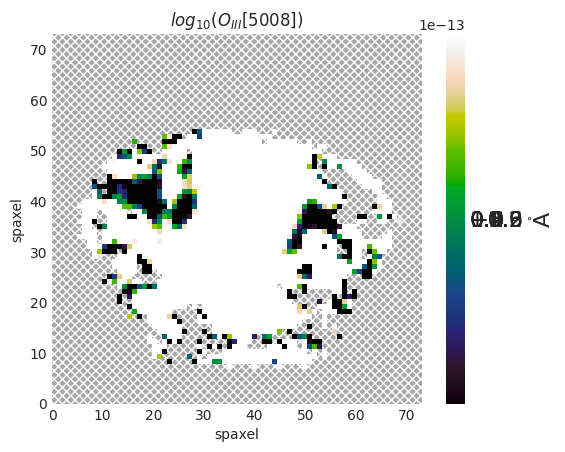

10517-3701


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)
[WARNING]: invalid value encountered in log10 (RuntimeWarning)


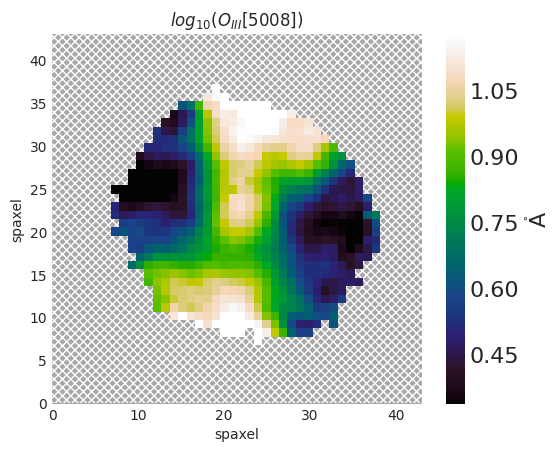

10518-3704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


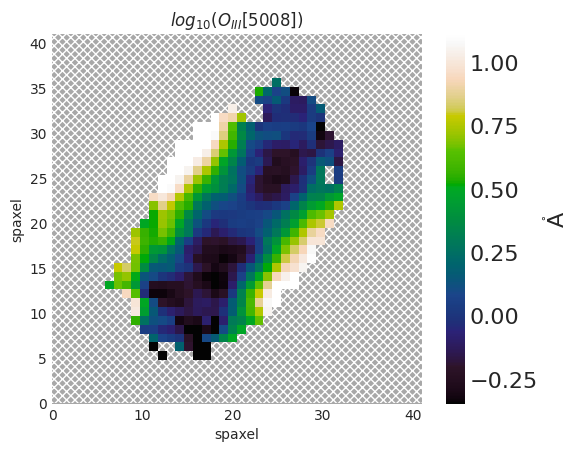

11826-6103


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


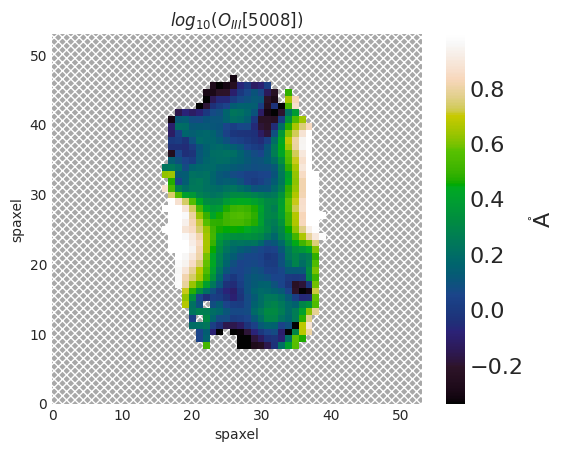

11958-3703


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


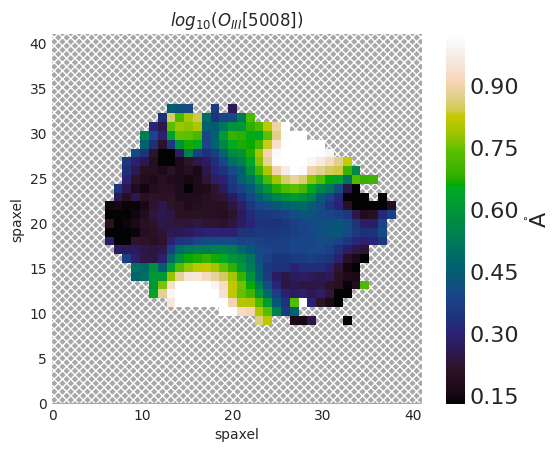

12673-6101


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)
[WARNING]: invalid value encountered in log10 (RuntimeWarning)


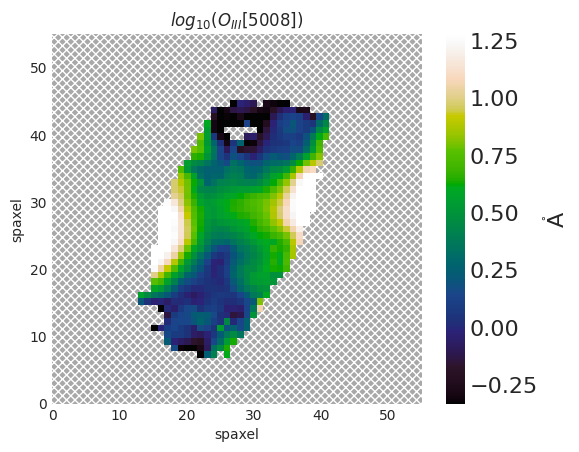

12700-6101


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)
[WARNING]: invalid value encountered in log10 (RuntimeWarning)


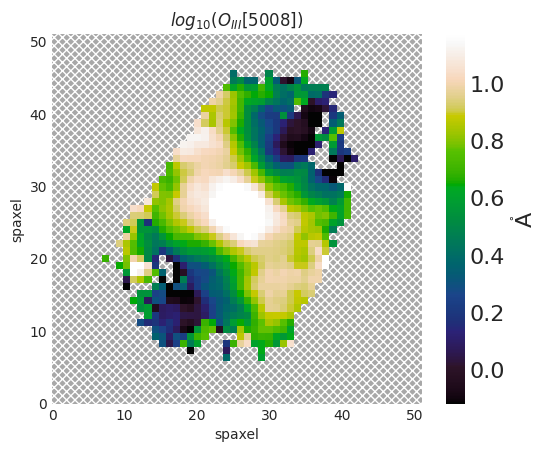

"\nThere's data problem when plotting:\n8486-12705\n9031-12704\n10502-12701\n"

In [110]:
for data in hdu:
    maps = Maps(str(data[0]), bintype='SPX', template='MILESHC-MASTARSSP')
    print(data[0])
    oiii_ew = np.log10(maps.emline_gew_oiii_5008)
    oiii_ew.plot(title = r"$log_{10}(O_{III}[5008])$", snr_min = None)
    plt.show()
    
'''
There's data problem when plotting:
8486-12705
9031-12704
10502-12701
'''

In [119]:
# show image of interesting ones from the OIII plot
image = showImage(plateifu='12700-6101')

[WARNING]: subprocess 52819 is still running (ResourceWarning)


## plot the BPT for our obvious bi-cone galaxies:

7958-9101


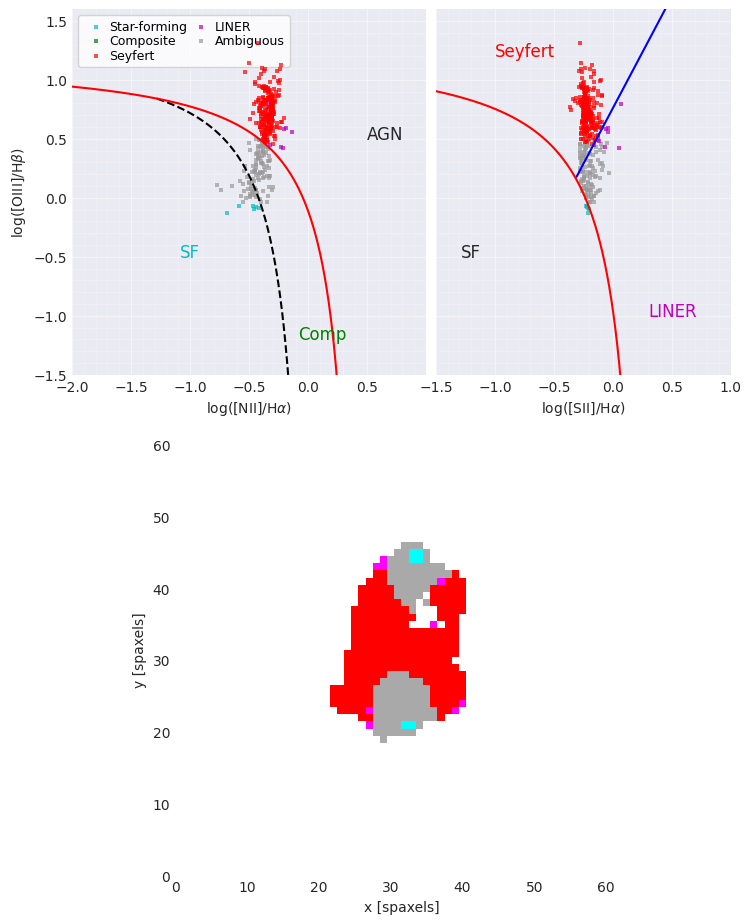

7972-3704


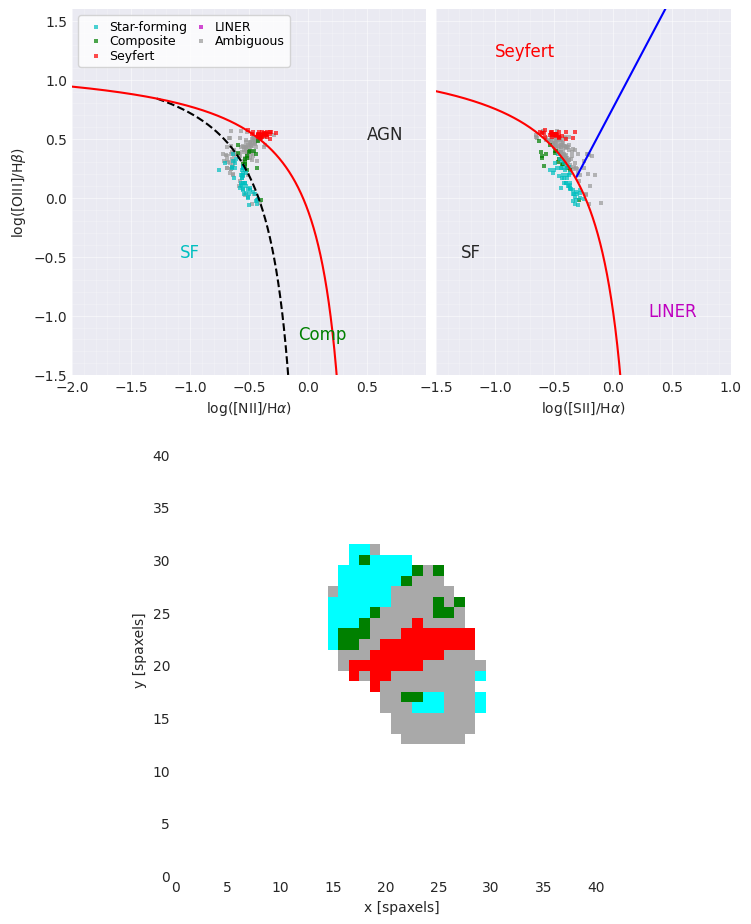

8138-6101


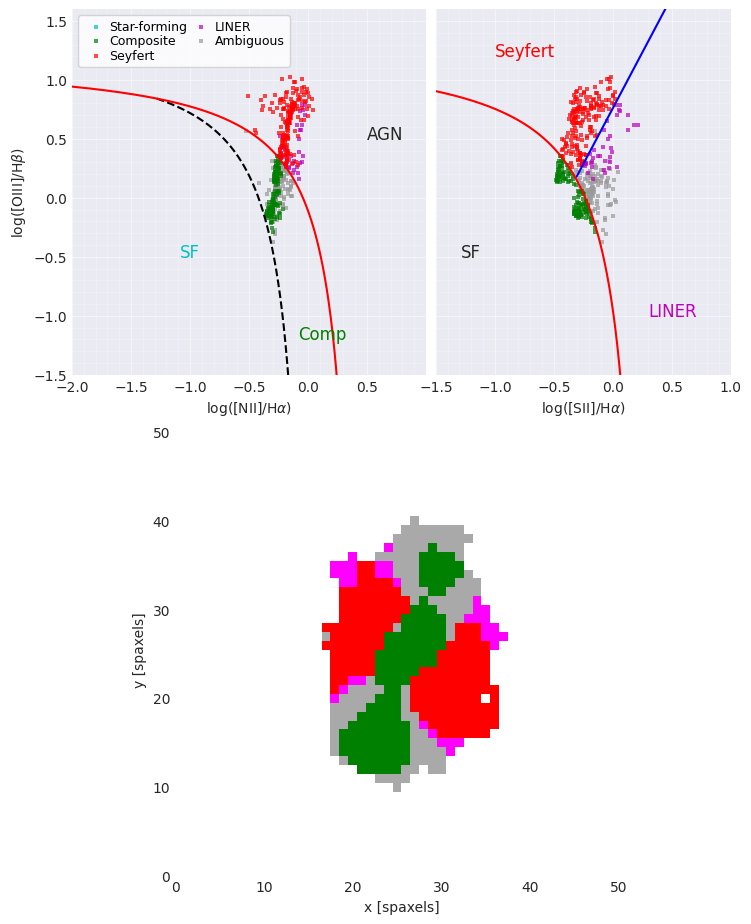

8252-9101


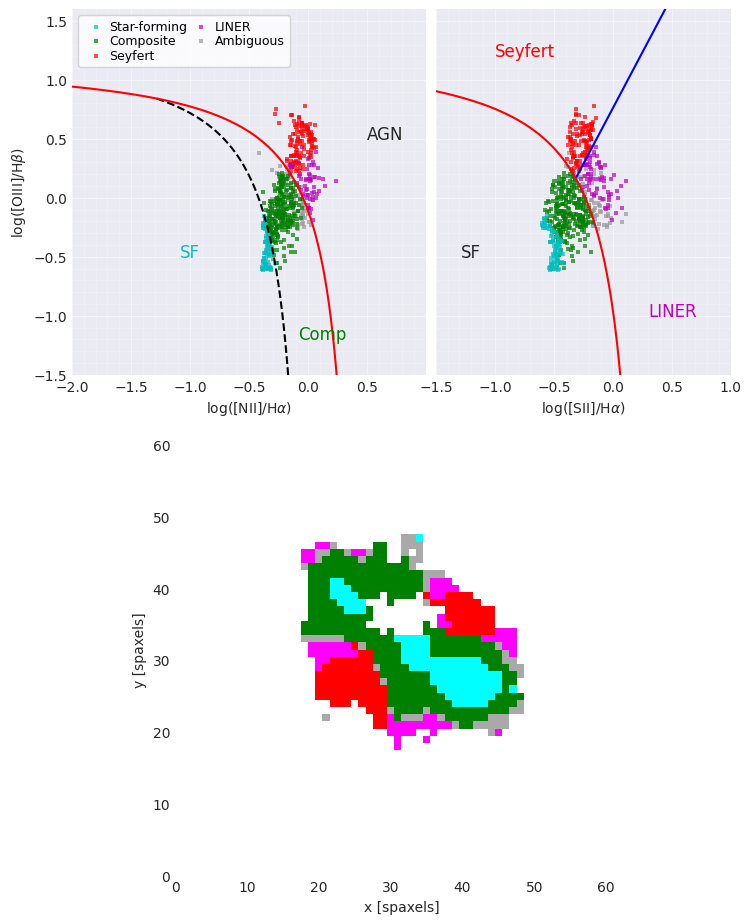

8465-12704


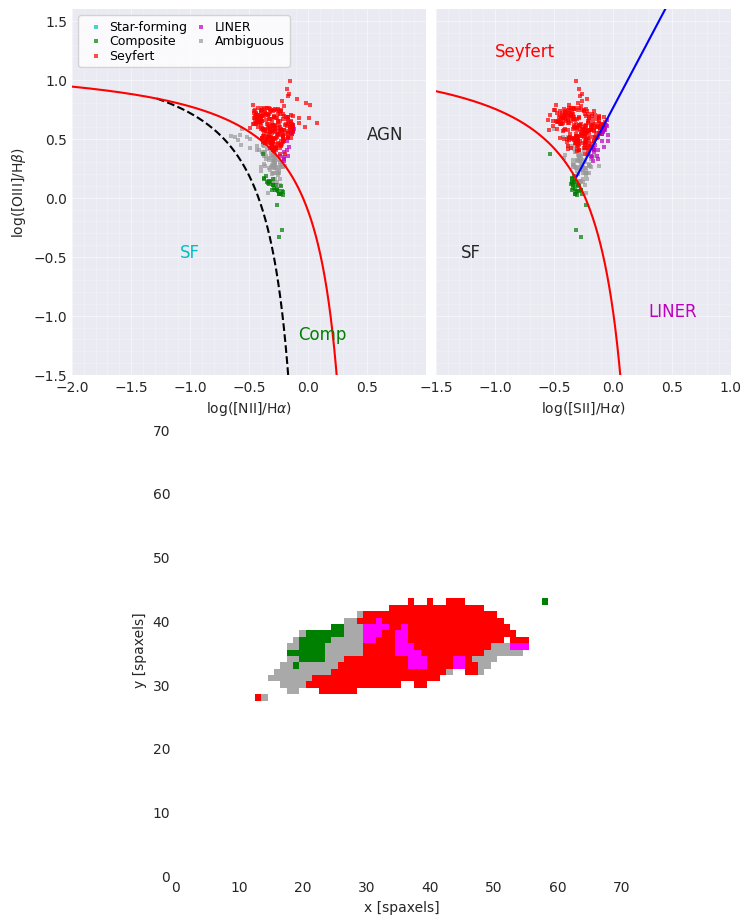

8486-12705


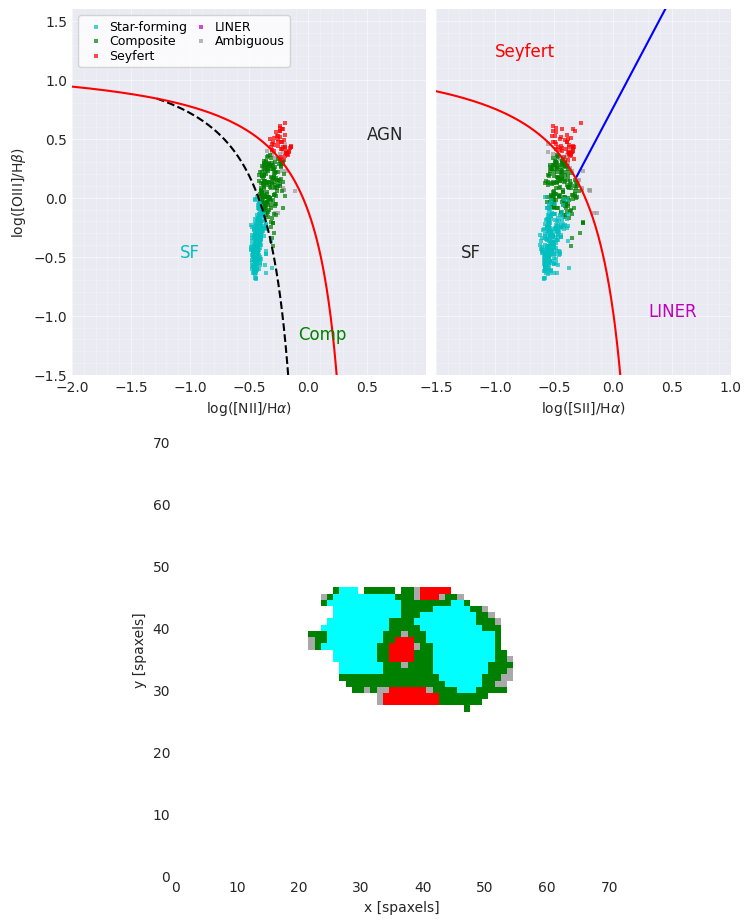

8715-6103


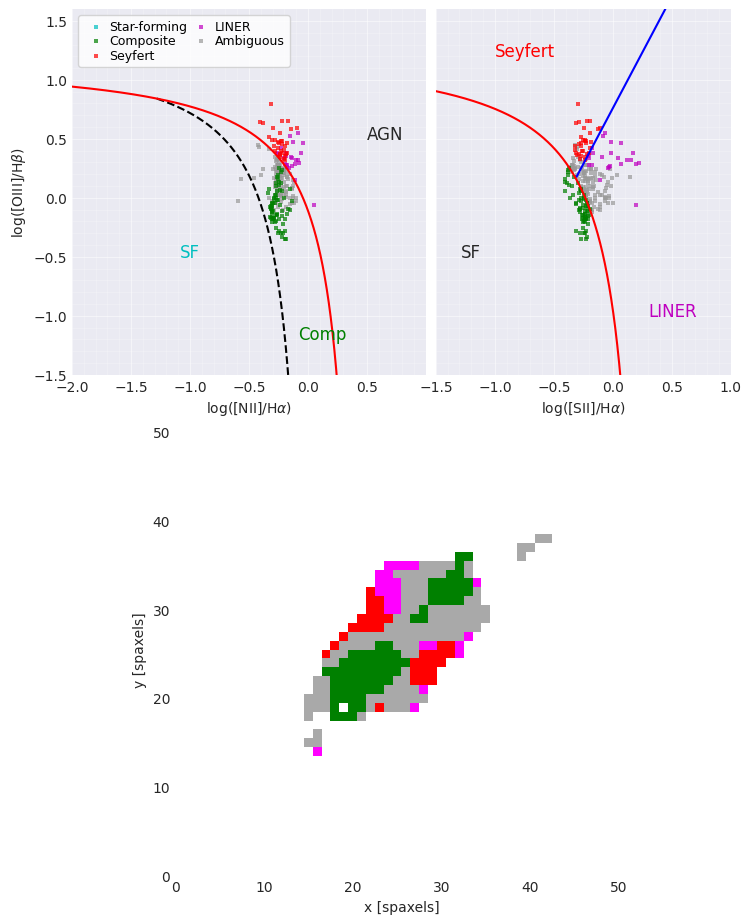

8718-12702


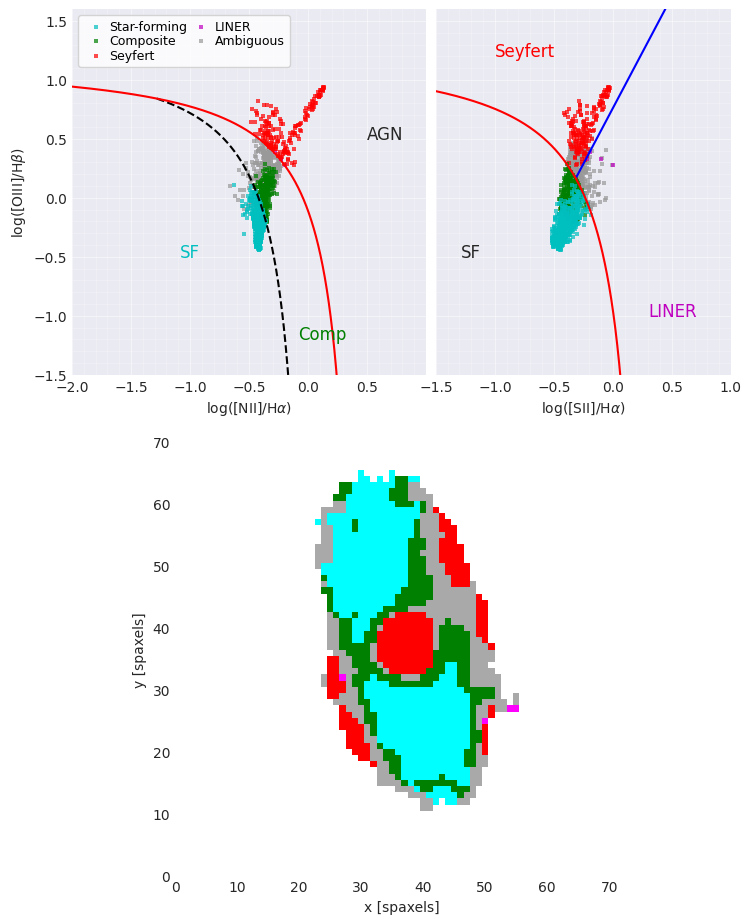

9031-12704


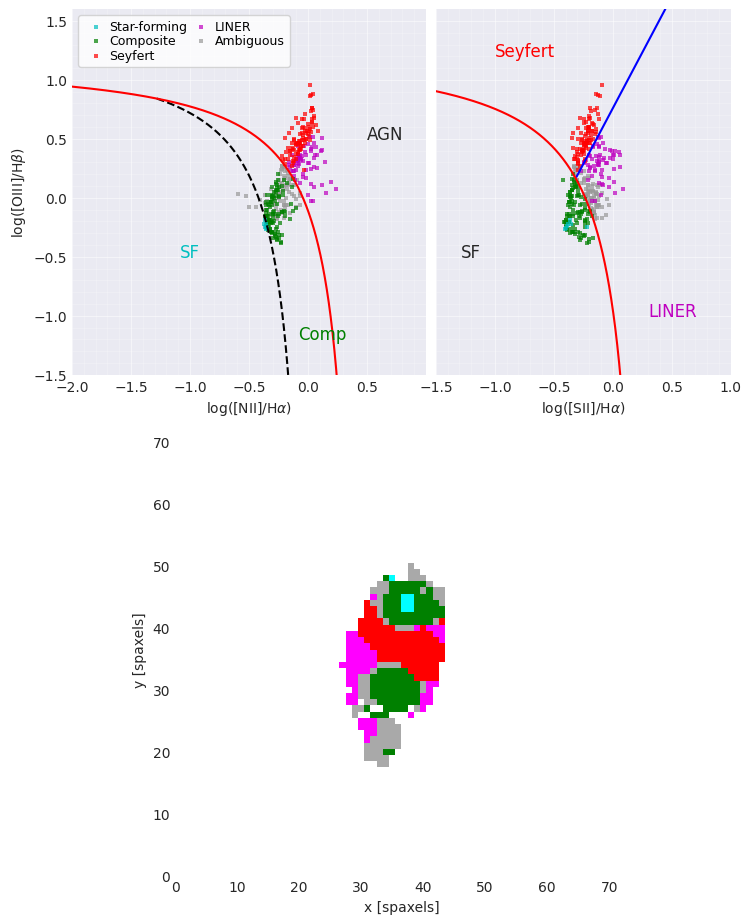

9867-9102


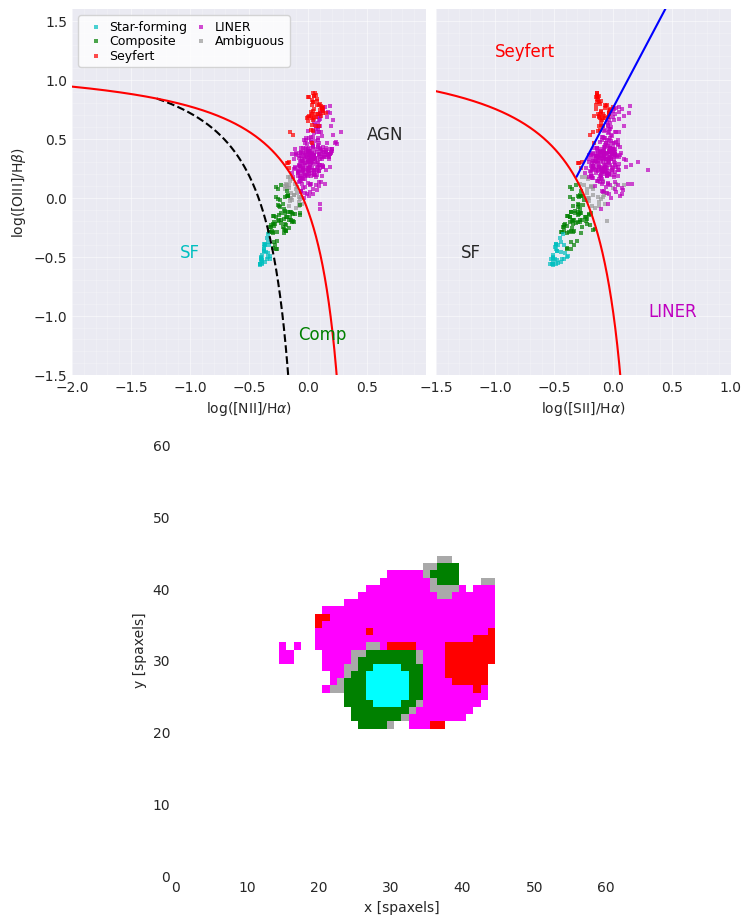

10502-12701


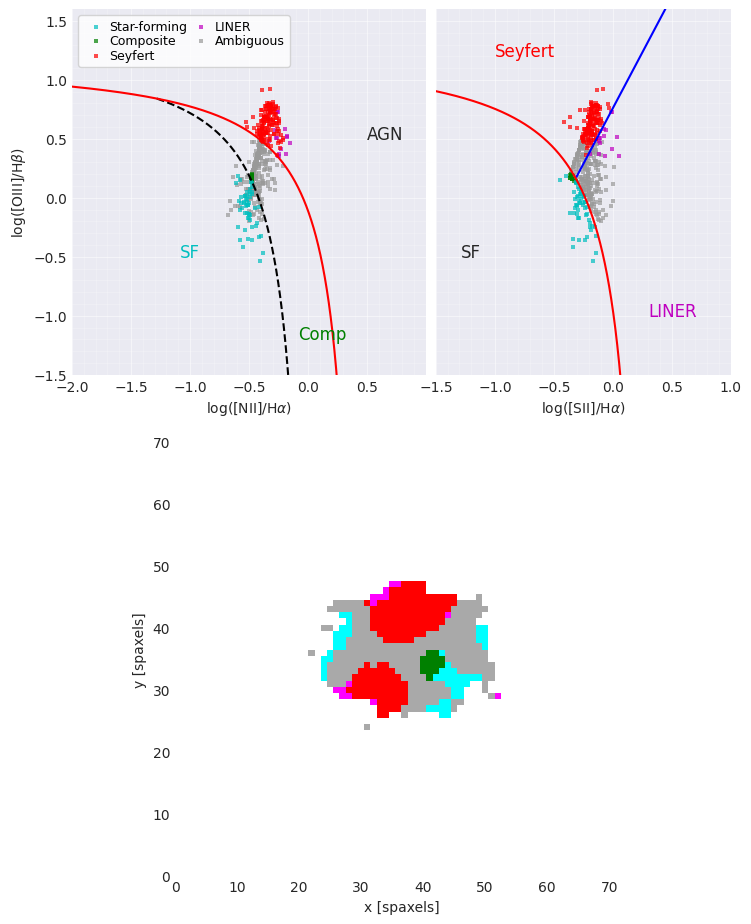

10517-3701


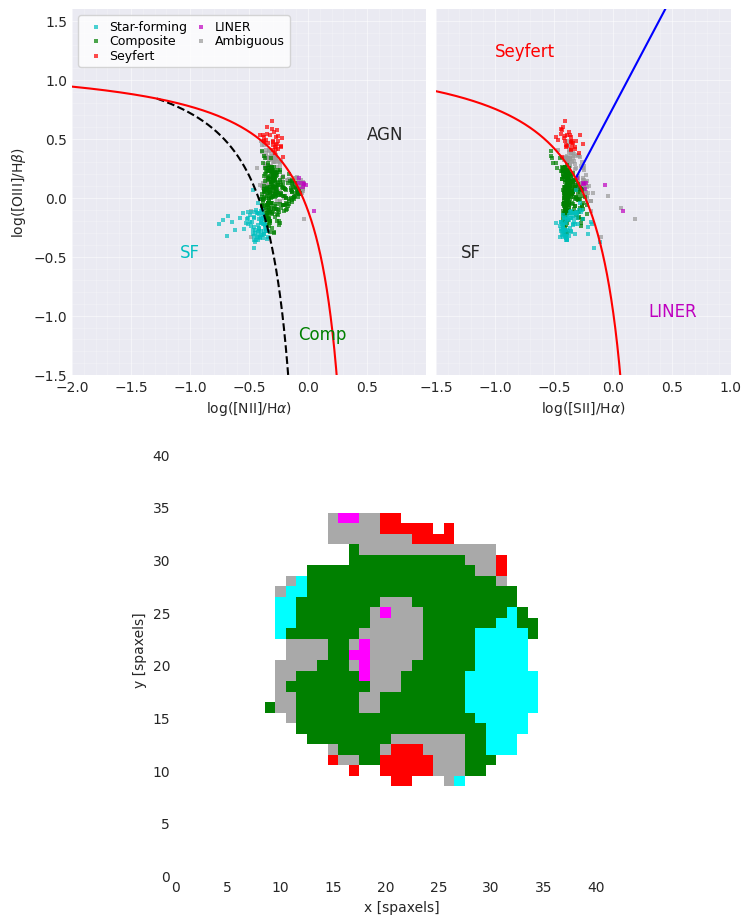

10518-3704


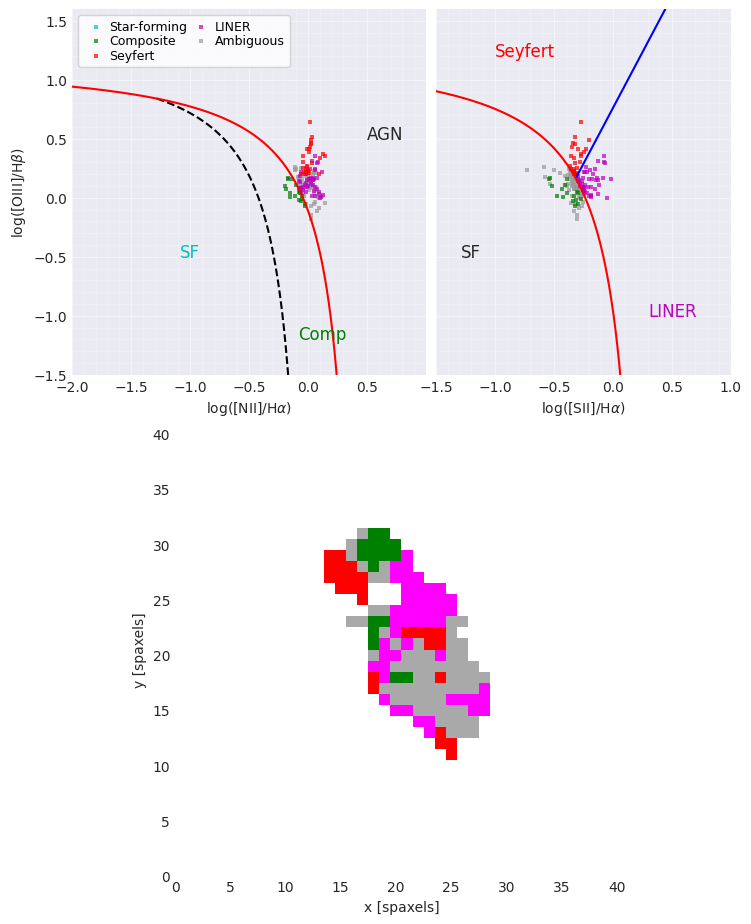

11826-6103


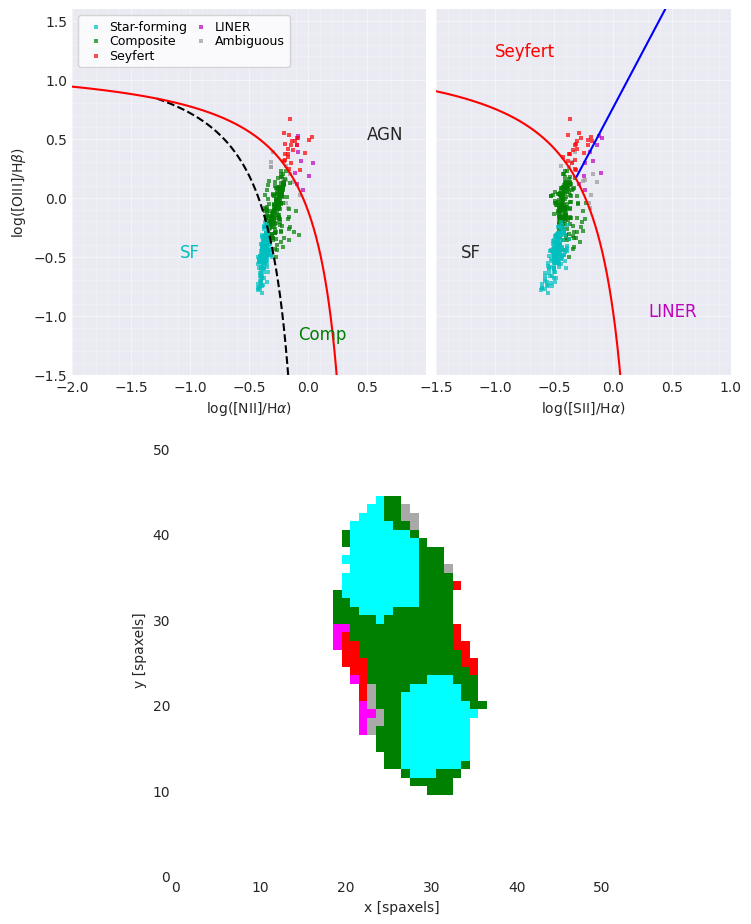

11958-3703


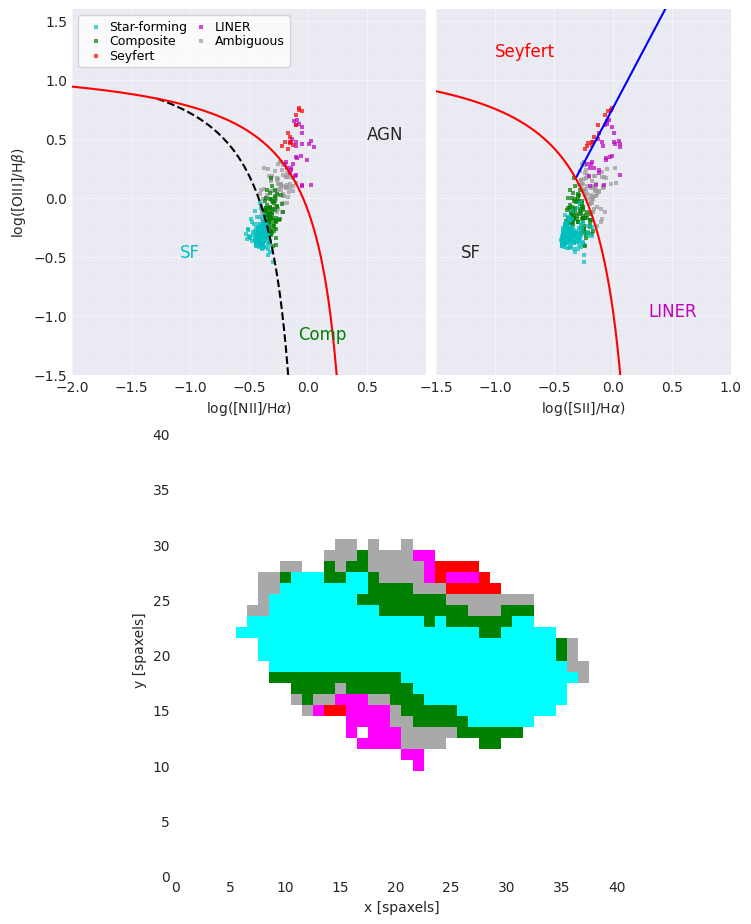

12673-6101


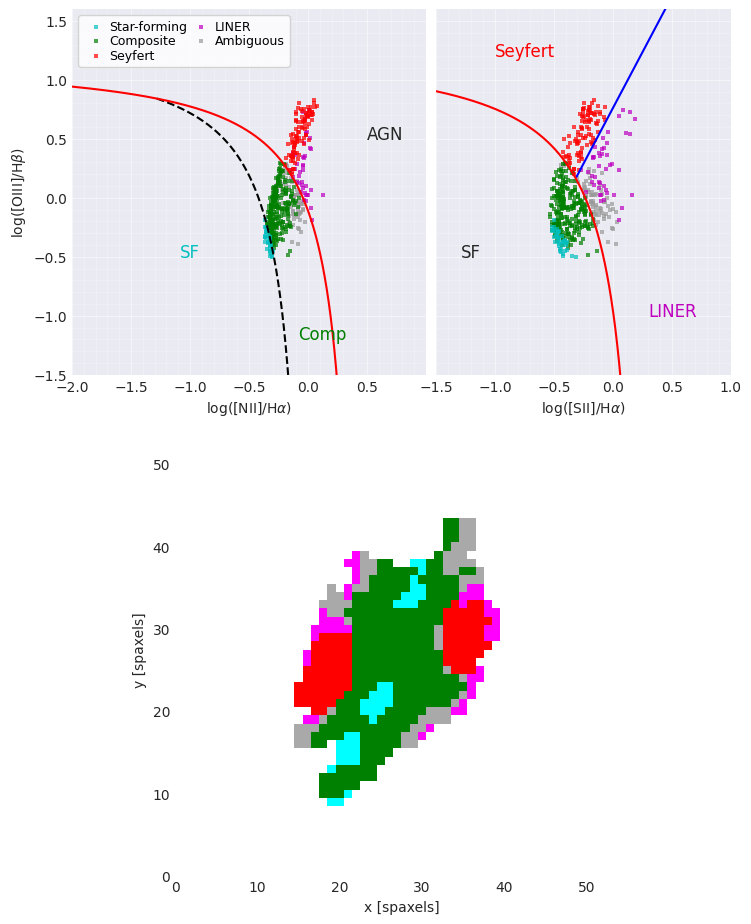

12700-6101


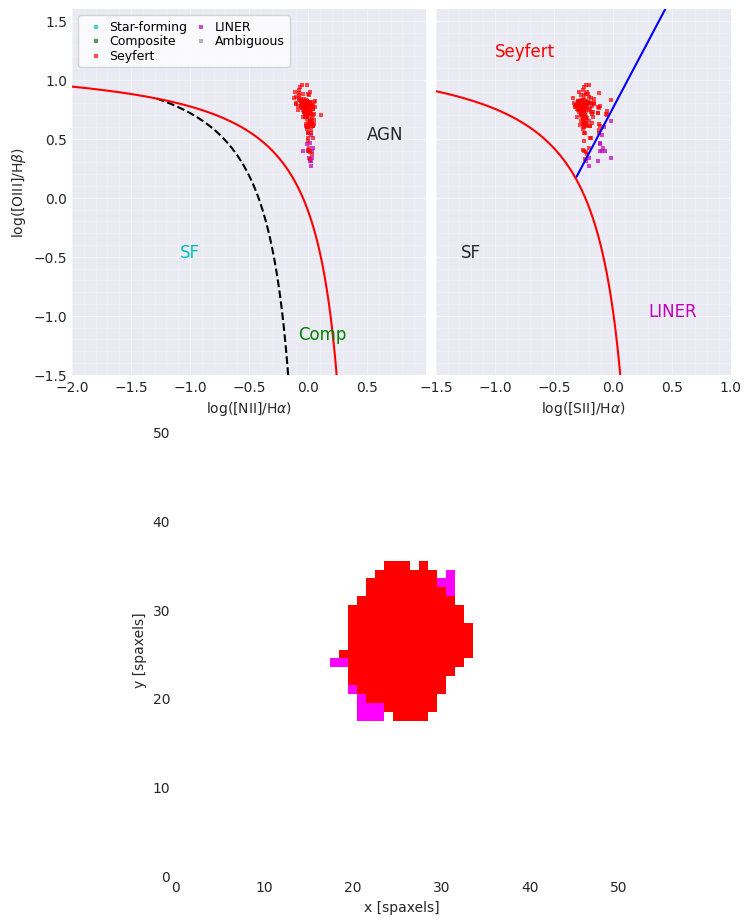

In [5]:
for data in hdu:
    maps = Maps(str(data[0]), bintype='SPX', template='MILESHC-MASTARSSP')
    print(data[0])
    mask, fig, axes = maps.get_bpt(use_oi = False)
    
    

